# Land Use

## Setup

In [ ]:
%pip install roboflow

In [ ]:
# Download the SAM checkpoint
!wget -O sam_vit_h.pth https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


In [ ]:
%pip install \
'git+https://github.com/facebookresearch/segment-anything.git'

In [ ]:
%pip install torch torchvision torchaudio



In [ ]:
%pip install torch --upgrade

In [6]:
import os
from pathlib import Path
from roboflow import Roboflow
import cv2
import numpy as np
from segment_anything import SamPredictor, sam_model_registry

In [7]:
HOME = Path.cwd()

In [8]:
datasets_dir = HOME / 'datasets'

# Create the datasets directory (if it doesn't already exist)
datasets_dir.mkdir(parents=True, exist_ok=True)

In [9]:
rf = Roboflow(api_key="oO7M6O03cXw3x36PVBxq") # Replace with your actual API key

## Codigo

### Dataset

In [10]:
os.chdir(datasets_dir)

project = rf.workspace("geckos-land").project("drone-6vm9j")
version = project.version(1)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drone-1 in coco:: 100%|██████████| 372/372 [00:00<00:00, 1034.59it/s]


### Train yolo on turgraz drone dataset

In [13]:
os.chdir(datasets_dir)

project = rf.workspace("geckos-land").project("drone-6vm9j")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


### Train on Galapagos dataset with model train on turgraz drone dataset

#### Galapagos dataset

### Use sam for object detection

In [11]:
# Dataset path
images_path = dataset.location + "/train"  # Path to training images
annotations_path = dataset.location + "/_annotations.coco.json"  # Path to COCO annotations


In [12]:
print(dataset.location)

/content/datasets/Drone-1


In [ ]:
# Load SAM
sam_checkpoint = "sam_vit_h.pth"  # Download this from the SAM GitHub repo
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to("cuda")  # Use GPU for faster processing
predictor = SamPredictor(sam)

In [ ]:
# Load a sample image from the dataset
image_path = f"{images_path}/000_jpg.rf.1100e84e5241eebe104b8e90ac0f9bf1.jpg"  # Replace with a valid image name
print(image_path)
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set the image in the SAM predictor
predictor.set_image(image_rgb)

/content/datasets/Drone-1/train/000_jpg.rf.1100e84e5241eebe104b8e90ac0f9bf1.jpg


In [ ]:
import cv2
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)

image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
result = mask_generator.generate(image_rgb)

In [ ]:
import numpy as np
import supervision as sv
import cv2

# Generate a list of colors (one for each detection)
# You can choose any color scheme you prefer
def generate_colors(num_colors):
    np.random.seed(42)  # For reproducibility
    return np.random.randint(0, 255, size=(num_colors, 3), dtype=int)

# Get the number of detections
num_detections = len(detections)
colors = generate_colors(num_detections)

# Assign each detection a color
for idx, detection in enumerate(detections):
    detection.color = colors[idx]

# Annotate the image
mask_annotator = sv.MaskAnnotator()
annotated_image = mask_annotator.annotate(image_bgr, detections)

# Display the annotated image
import matplotlib.pyplot as plt
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import supervision as sv
import matplotlib.pyplot as plt

# Generate random colors
def generate_colors(num_colors):
    np.random.seed(42)  # For reproducibility
    return np.random.randint(0, 255, size=(num_colors, 3), dtype=int)

# Assuming `detections` is a valid sv.Detections object from SAM
num_detections = len(detections)
colors = generate_colors(num_detections)

# Convert detections to the correct format and include colors manually
# Here we're just passing the detections as is, but make sure you have the proper format
mask_annotator = sv.MaskAnnotator()

# Annotate with random colors (this should be sufficient now)
annotated_image = mask_annotator.annotate(image_bgr, detections)

# Display the annotated image
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


In [ ]:
os.chdir(f"{HOME}/datasets")

from roboflow import Roboflow
rf = Roboflow(api_key="oO7M6O03cXw3x36PVBxq")
project = rf.workspace("geckos-land").project("drone-6vm9j")
version = project.version(1)
dataset = version.download("coco-segmentation")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drone-1 in coco-segmentation:: 100%|██████████| 372/372 [00:00<00:00, 2227.08it/s]


In [ ]:
import supervision as sv

mask_annotator = sv.MaskAnnotator()
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(image_bgr, detections, color_lookup=sv.ColorLookup.INDEX)

In [ ]:
import cv2
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)

image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
result = mask_generator.generate(image_rgb)

In [ ]:
import supervision as sv

mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX) # INDEX # CLASS #TRACK
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(image_bgr, detections)

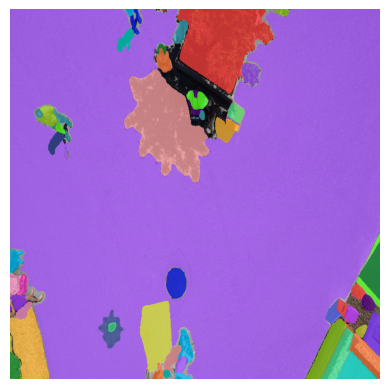

In [ ]:
# Assuming 'result' is the output from SAM (Segment Anything Model)
# and 'image_bgr' is the original image loaded using OpenCV

# Initialize the mask annotator (you can change the color_lookup as needed)
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)  # You can use INDEX, CLASS, or TRACK for coloring

# Convert 'result' from SAM to detections (ensure 'result' is in the expected format)
detections = sv.Detections.from_sam(result)

# Annotate the image with detected masks
annotated_image = mask_annotator.annotate(image_bgr, detections)

# Convert annotated image from BGR to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the annotated image
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels for better presentation
plt.show()


In [ ]:
import os
import cv2
import supervision as sv
import matplotlib.pyplot as plt

# Path to the dataset (update this path)
dataset_path = "/content/datasets/Drone-1/train/"  # Replace with your images folder path

# Assuming you have SAM's results and annotations
# For the sake of this example, I'm assuming you already have a result object for each image.
# You can process each image through SAM as shown earlier.

# MaskAnnotator for segmentation
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

# Loop over all images in the dataset directory
for image_name in os.listdir(dataset_path):
    if image_name.endswith(".jpg") or image_name.endswith(".png"):  # Process only image files
        image_path = os.path.join(dataset_path, image_name)

        mask_generator = SamAutomaticMaskGenerator(sam)

        image_bgr = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        result = mask_generator.generate(image_rgb)

        # Read the image
        image_bgr = cv2.imread(image_path)

        # Check if image is loaded correctly
        if image_bgr is None:
            print(f"Failed to load image: {image_path}")
            continue

        # (Optional) Get segmentation result from SAM for the current image
        # result = your_sam_inference_function(image_bgr)
        # Here, we're assuming 'result' is a placeholder for SAM's output

        # Convert result from SAM to detections (make sure 'result' is valid and properly formatted)
        detections = sv.Detections.from_sam(result)  # Assuming 'result' is the output from SAM

        # Annotate the image with detected masks
        annotated_image = mask_annotator.annotate(image_bgr, detections)

        # Convert annotated image from BGR to RGB (for displaying with matplotlib)
        image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

        # Display the annotated image
        plt.imshow(image_rgb)
        plt.title(f"Annotated Image: {image_name}")  # Add title for context
        plt.axis('off')  # Turn off axis labels for better presentation
        plt.show()


In [ ]:

# Path to your dataset
dataset_path = "/content/datasets/Drone-1/train/"  # Image folder path
annotations_path = "/content/datasets/Drone-1/train/_annotations.coco.json"  # COCO annotations file path

In [ ]:
import os
import cv2
import json
import numpy as np
import supervision as sv
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask


# Load the COCO annotations
with open(annotations_path, 'r') as f:
    coco_data = json.load(f)

# Extract image information and ground truth masks from the COCO annotations
images = coco_data['images']
annotations = coco_data['annotations']
categories = coco_data['categories']
annotations_by_image = {}

# Organize annotations by image ID
for ann in annotations:
    img_id = ann['image_id']
    if img_id not in annotations_by_image:
        annotations_by_image[img_id] = []
    annotations_by_image[img_id].append(ann)

# Function to compute Intersection over Union (IoU)
def compute_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask)
    union = np.logical_or(pred_mask, gt_mask)
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0
    return iou

# Initialize metrics lists
ious = []
precisions = []
recalls = []
f1_scores = []

# Initialize Mask Annotator from Supervision
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

# Loop over all images in the dataset
for image_info in images:
    image_id = image_info['id']
    image_name = image_info['file_name']

    # Get the image and the ground truth annotations for this image
    image_path = os.path.join(dataset_path, image_name)
    image_bgr = cv2.imread(image_path)

    # Create an empty mask for the ground truth
    gt_mask = np.zeros(image_bgr.shape[:2], dtype=np.uint8)

    # Draw the ground truth masks from the annotations (if present)
    for ann in annotations_by_image.get(image_id, []):
        if 'segmentation' in ann:
            # Handle segmentation in COCO format (polygon or RLE)
            seg = ann['segmentation']
            if isinstance(seg, list):
                for poly in seg:
                    cv2.fillPoly(gt_mask, [np.array(poly, dtype=np.int32)], 1)  # Draw polygon mask
            elif isinstance(seg, dict):
                rle = coco_mask.frPyObjects(seg, image_bgr.shape[0], image_bgr.shape[1])  # RLE mask
                mask = coco_mask.decode(rle)
                gt_mask = np.maximum(gt_mask, mask)  # Combine multiple masks

    # (Optional) Get segmentation result from SAM for the current image
    # result = your_sam_inference_function(image_bgr)
    # Assuming 'result' is the output from SAM

    detections = sv.Detections.from_sam(result)  # Convert SAM result to detections

    # Annotate the image with the predicted masks
    annotated_image = mask_annotator.annotate(image_bgr, detections)

    # Get the predicted mask from the detections (use the first detected mask)
    pred_mask = detections.masks[0].numpy() if detections.masks else np.zeros_like(gt_mask)

    # Compute IoU
    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

    # Compute Precision, Recall, and F1 score (binarize the masks)
    pred_bin = (pred_mask > 0).astype(int)
    gt_bin = (gt_mask > 0).astype(int)

    precision = precision_score(gt_bin.flatten(), pred_bin.flatten())
    recall = recall_score(gt_bin.flatten(), pred_bin.flatten())
    f1 = f1_score(gt_bin.flatten(), pred_bin.flatten())

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Display the annotated image (optional)
    image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(f"Annotated Image: {image_name}")
    plt.axis('off')
    plt.show()

# Compute the average metrics
avg_iou = np.mean(ious)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Print the average metrics
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")


In [ ]:
import os
import cv2
import supervision as sv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Path to the dataset
dataset_path = "/content/datasets/Drone-1/train/"  # Replace with your image folder path
ground_truth_path = "/content/datasets/Drone-1/train/masks"  # Replace with your ground truth masks path

# Assuming you have SAM's result processing function (predictor.predict() etc.)
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

# Function to compute Intersection over Union (IoU)
def compute_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask)
    union = np.logical_or(pred_mask, gt_mask)
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0
    return iou

# Initialize a list to store metrics for each image
ious = []
precisions = []
recalls = []
f1_scores = []

# Loop over all images in the dataset
for image_name in os.listdir(dataset_path):
    if image_name.endswith(".jpg") or image_name.endswith(".png"):  # Process only image files
        image_path = os.path.join(dataset_path, image_name)
        ground_truth_mask_path = os.path.join(ground_truth_path, image_name.replace('.jpg', '.png'))  # Assuming mask files are .png

        # Read the image and ground truth mask
        image_bgr = cv2.imread(image_path)
        gt_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)  # Read ground truth mask in grayscale

        # Check if the image and mask are loaded correctly
        if image_bgr is None or gt_mask is None:
            print(f"Failed to load image or ground truth mask: {image_path} or {ground_truth_mask_path}")
            continue

        # (Optional) Get segmentation result from SAM for the current image
        # result = your_sam_inference_function(image_bgr)
        # Here, we're assuming 'result' is a placeholder for SAM's output

        # Convert result from SAM to detections (make sure 'result' is valid and properly formatted)
        detections = sv.Detections.from_sam(result)  # Assuming 'result' is the output from SAM

        # Annotate the image with detected masks
        annotated_image = mask_annotator.annotate(image_bgr, detections)

        # Get the predicted mask from the detections (assume the first mask is the target)
        pred_mask = detections.masks[0].numpy() if detections.masks else np.zeros_like(gt_mask)

        # Compute IoU
        iou = compute_iou(pred_mask, gt_mask)
        ious.append(iou)

        # Compute Precision, Recall, and F1 score (binarize the masks)
        pred_bin = (pred_mask > 0).astype(int)
        gt_bin = (gt_mask > 0).astype(int)

        precision = precision_score(gt_bin.flatten(), pred_bin.flatten())
        recall = recall_score(gt_bin.flatten(), pred_bin.flatten())
        f1 = f1_score(gt_bin.flatten(), pred_bin.flatten())

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Display the annotated image (optional)
        image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title(f"Annotated Image: {image_name}")
        plt.axis('off')
        plt.show()

# Compute the average metrics
avg_iou = np.mean(ious)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

# Print the average metrics
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")


In [ ]:
# Loop over all images in the dataset
for image_info in images:
    image_id = image_info['id']
    image_name = image_info['file_name']

    # Get the image and the ground truth annotations for this image
    image_path = os.path.join(dataset_path, image_name)
    image_bgr = cv2.imread(image_path)

    # Check if the image was loaded properly
    if image_bgr is None:
        print(f"Warning: Failed to load image {image_name} at {image_path}")
        continue  # Skip this image and go to the next one

    # Create an empty mask for the ground truth
    gt_mask = np.zeros(image_bgr.shape[:2], dtype=np.uint8)

    # Draw the ground truth masks from the annotations (if present)
    for ann in annotations_by_image.get(image_id, []):
        if 'segmentation' in ann:
            # Handle segmentation in COCO format (polygon or RLE)
            seg = ann['segmentation']
            if isinstance(seg, list):
                for poly in seg:
                    cv2.fillPoly(gt_mask, [np.array(poly, dtype=np.int32)], 1)  # Draw polygon mask
            elif isinstance(seg, dict):
                rle = coco_mask.frPyObjects(seg, image_bgr.shape[0], image_bgr.shape[1])  # RLE mask
                mask = coco_mask.decode(rle)
                gt_mask = np.maximum(gt_mask, mask)  # Combine multiple masks

    # (Optional) Get segmentation result from SAM for the current image
    # result = your_sam_inference_function(image_bgr)
    # Assuming 'result' is the output from SAM

    detections = sv.Detections.from_sam(result)  # Convert SAM result to detections

    # Annotate the image with the predicted masks
    annotated_image = mask_annotator.annotate(image_bgr, detections)

    # Get the predicted mask from the detections (use the first detected mask)
    pred_mask = detections.masks[0].numpy() if detections.masks else np.zeros_like(gt_mask)

    # Compute IoU
    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

    # Compute Precision, Recall, and F1 score (binarize the masks)
    pred_bin = (pred_mask > 0).astype(int)
    gt_bin = (gt_mask > 0).astype(int)

    precision = precision_score(gt_bin.flatten(), pred_bin.flatten())
    recall = recall_score(gt_bin.flatten(), pred_bin.flatten())
    f1 = f1_score(gt_bin.flatten(), pred_bin.flatten())

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Display the annotated image (optional)
    image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(f"Annotated Image: {image_name}")
    plt.axis('off')
    plt.show()


In [ ]:
import os
import cv2
import numpy as np
import supervision as sv
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from pycocotools import mask as coco_mask

# Define function to compute IoU
def compute_iou(pred_mask, gt_mask):
    intersection = np.sum(np.logical_and(pred_mask, gt_mask))
    union = np.sum(np.logical_or(pred_mask, gt_mask))
    return intersection / union if union != 0 else 0.0

# Initialize lists to store metrics
ious = []
precisions = []
recalls = []
f1_scores = []

# Loop over all images in the dataset
for image_info in images:
    image_id = image_info['id']
    image_name = image_info['file_name']

    # Get the image and the ground truth annotations for this image
    image_path = os.path.join(dataset_path, image_name)
    image_bgr = cv2.imread(image_path)

    # Check if the image was loaded properly
    if image_bgr is None:
        print(f"Warning: Failed to load image {image_name} at {image_path}")
        continue  # Skip this image and go to the next one

    # Create an empty mask for the ground truth
    gt_mask = np.zeros(image_bgr.shape[:2], dtype=np.uint8)

    # Draw the ground truth masks from the annotations (if present)
    for ann in annotations_by_image.get(image_id, []):
        if 'segmentation' in ann:
            seg = ann['segmentation']
            if isinstance(seg, list):  # Handle polygons
                for poly in seg:
                    if isinstance(poly, list) and len(poly) > 2:  # Valid polygon check
                        points = np.array(poly, dtype=np.int32).reshape((-1, 1, 2))
                        cv2.fillPoly(gt_mask, [points], 1)  # Draw polygon mask
            elif isinstance(seg, dict):  # Handle RLE format
                rle = coco_mask.frPyObjects(seg, image_bgr.shape[0], image_bgr.shape[1])
                mask = coco_mask.decode(rle)
                gt_mask = np.maximum(gt_mask, mask)  # Combine multiple masks

    # (Optional) Get segmentation result from SAM for the current image
    # result = your_sam_inference_function(image_bgr)  # Perform SAM inference here

    # Convert SAM result to detections (assuming `result` is available)
    detections = sv.Detections.from_sam(result)  # SAM detection results

    # Annotate the image with the predicted masks
    mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)  # Change color lookup if needed
    annotated_image = mask_annotator.annotate(image_bgr, detections)

    # Get the predicted mask from the detections (assuming there's at least one detection)
    pred_mask = detections.masks[0].numpy() if detections.masks else np.zeros_like(gt_mask)

    # Compute IoU
    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

    # Compute Precision, Recall, and F1 score (binarize the masks)
    pred_bin = (pred_mask > 0).astype(int)
    gt_bin = (gt_mask > 0).astype(int)

    precision = precision_score(gt_bin.flatten(), pred_bin.flatten())
    recall = recall_score(gt_bin.flatten(), pred_bin.flatten())
    f1 = f1_score(gt_bin.flatten(), pred_bin.flatten())

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Display the annotated image (optional)
    image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(f"Annotated Image: {image_name}")
    plt.axis('off')
    plt.show()

# Calculate average metrics
avg_iou = np.mean(ious) if ious else 0
avg_precision = np.mean(precisions) if precisions else 0
avg_recall = np.mean(recalls) if recalls else 0
avg_f1 = np.mean(f1_scores) if f1_scores else 0

# Print out the average metrics
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")


In [ ]:
# Wrong

import os
import cv2
import numpy as np
import supervision as sv
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from pycocotools import mask as coco_mask

# Define function to compute IoU
def compute_iou(pred_mask, gt_mask):
    intersection = np.sum(np.logical_and(pred_mask, gt_mask))
    union = np.sum(np.logical_or(pred_mask, gt_mask))
    return intersection / union if union != 0 else 0.0

# Initialize lists to store metrics
ious = []
precisions = []
recalls = []
f1_scores = []

# Loop over all images in the dataset
for image_info in images:
    image_id = image_info['id']
    image_name = image_info['file_name']

    # Get the image and the ground truth annotations for this image
    image_path = os.path.join(dataset_path, image_name)
    image_bgr = cv2.imread(image_path)

    # Check if the image was loaded properly
    if image_bgr is None:
        print(f"Warning: Failed to load image {image_name} at {image_path}")
        continue  # Skip this image and go to the next one

    # Create an empty mask for the ground truth
    gt_mask = np.zeros(image_bgr.shape[:2], dtype=np.uint8)

    # Draw the ground truth masks from the annotations (if present)
    for ann in annotations_by_image.get(image_id, []):
        if 'segmentation' in ann:
            seg = ann['segmentation']
            if isinstance(seg, list):  # Handle polygons
                for poly in seg:
                    if isinstance(poly, list) and len(poly) > 2:  # Valid polygon check
                        points = np.array(poly, dtype=np.int32).reshape((-1, 1, 2))
                        cv2.fillPoly(gt_mask, [points], 1)  # Draw polygon mask
            elif isinstance(seg, dict):  # Handle RLE format
                rle = coco_mask.frPyObjects(seg, image_bgr.shape[0], image_bgr.shape[1])
                mask = coco_mask.decode(rle)
                gt_mask = np.maximum(gt_mask, mask)  # Combine multiple masks

    # (Optional) Get segmentation result from SAM for the current image
    # result = your_sam_inference_function(image_bgr)  # Perform SAM inference here

    # Convert SAM result to detections (assuming `result` is available)
    detections = sv.Detections.from_sam(result)  # SAM detection results

    # Check if detections have masks and handle accordingly
    if hasattr(detections, 'masks') and detections.masks is not None:
        pred_mask = detections.masks[0].numpy()  # Assuming the first mask is what we want
    else:
        print(f"No masks found in the detections for image {image_name}")
        pred_mask = np.zeros_like(gt_mask)  # If no masks, use an empty mask

    # Annotate the image with the predicted masks
    mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)  # Change color lookup if needed
    annotated_image = mask_annotator.annotate(image_bgr, detections)

    # Compute IoU
    iou = compute_iou(pred_mask, gt_mask)
    ious.append(iou)

    # Compute Precision, Recall, and F1 score (binarize the masks)
    pred_bin = (pred_mask > 0).astype(int)
    gt_bin = (gt_mask > 0).astype(int)

    precision = precision_score(gt_bin.flatten(), pred_bin.flatten())
    recall = recall_score(gt_bin.flatten(), pred_bin.flatten())
    f1 = f1_score(gt_bin.flatten(), pred_bin.flatten())

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Display the annotated image (optional)
    image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(f"Annotated Image: {image_name}")
    plt.axis('off')
    plt.show()

# Calculate average metrics
avg_iou = np.mean(ious) if ious else 0
avg_precision = np.mean(precisions) if precisions else 0
avg_recall = np.mean(recalls) if recalls else 0
avg_f1 = np.mean(f1_scores) if f1_scores else 0

# Print out the average metrics
print(f"Average IoU: {avg_iou:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")


In [ ]:
import cv2
from segment_anything import SamPredictor

mask_predictor = SamPredictor(sam)

image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
mask_predictor.set_image(image_rgb)

box = np.array([70, 247, 626, 926])
masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)